# Análise De Dados do Spotify



Neste projeto, analiso um dataset encontrado no Kaggle que contém informações sobre músicas, artistas, datas de lançamento, números de reproduções em plataformas como Spotify, TikTok e YouTube, na qual estão organizados por ranking 'All Time Ranking'. A partir desse conjunto de dados, realizarei a preparação, manipulação e análise para responder a algumas questões, como:
 - Quais são os 10 artistas com mais músicas em alta no Spotify?
 - Qual artista tem mais músicas lançadas em 2024?
 - Para o artista mais relevante, compare o desempenho entre Spotify e YouTube.
   
Para isso, utilizarei bibliotecas como **Pandas** para manipulação de dados, **Matplotlib** e **Seaborn** para criar gráficos e auxiliar na visualização desses dados.

In [1]:
#Importando as bibliotecas necessárias para as análises e visualições
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando a base de dados
data = pd.read_csv('projeto.csv', encoding='latin-1')

In [3]:
#Verificando informações sobre a base de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
#Visualizando o DataFrame
data.head(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0


In [5]:
#Verificando se há dados nulos
data.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [6]:
#Visualizando todas as colunas
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

Percebemos que há dados nulos em colunas importantes para a análise, como a coluna 'Artistas', 'Spotify Streams' e 'YouTube Views'. Podemos remover essas linhas com valores nulos, ou então substituir por valores estatísticos, como a média, moda ou a mediana. Para este projeto, farei a remoção destas linhas apenas destas colunas especificamente.
Além disso, há a presença de colunas que não são importantes para a análise, então tambem irei removê-las. Vamos criar um novo DataFrame chamado de 'new_data' com os dados já tratados para a análise.


In [7]:
#Removendo os dados nulos
data = data.dropna(subset=['Artist', 'Spotify Streams', 'YouTube Views'])

In [8]:
#Criando o novo DataFrame com as colunas removidas
new_data = data.drop(['Album Name', 'ISRC', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track', 'TikTok Likes', 'YouTube Likes', 'TikTok Posts', 'TikTok Views', 'Spotify Popularity', 'Spotify Playlist Reach', 'Spotify Playlist Count'], axis = 'columns')

In [9]:
#Verificando informações do novo DataFrame
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4218 entries, 0 to 4599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Track            4218 non-null   object 
 1   Artist           4218 non-null   object 
 2   Release Date     4218 non-null   object 
 3   All Time Rank    4218 non-null   object 
 4   Track Score      4218 non-null   float64
 5   Spotify Streams  4218 non-null   object 
 6   YouTube Views    4218 non-null   object 
dtypes: float64(1), object(6)
memory usage: 263.6+ KB


In [10]:
#Visualizando o DataFrame
new_data.head()

,Track,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,YouTube Views
0,MILLION DOLLAR BABY,Tommy Richman,4/26/2024,1,725.4,"390,470,936","84,274,754"
1,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","116,347,040"
2,i like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","122,599,116"
3,Flowers,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","1,096,100,899"
4,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","77,373,957"


Note que as colunas desnecessárias e os valores nulos foram removidos, diminuindo de 4600 resultados para 4218 linhas de resultados. Porém ainda existe algo a ser feito. Algumas colunas estão com o formato de dados errados, então precisaremos transformar os dados da coluna 'Release Date' para DateTime e os da colunas 'Spotify Streams' e 'YouTube View' para o formado Float e remover a ',' dos valores para que não haja erros futuros.

In [11]:
#Convertendo a coluna Release Date
new_data['Release Date'] = pd.to_datetime(new_data['Release Date'])

In [12]:
#Verificando se houver a conversão
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4218 entries, 0 to 4599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Track            4218 non-null   object        
 1   Artist           4218 non-null   object        
 2   Release Date     4218 non-null   datetime64[ns]
 3   All Time Rank    4218 non-null   object        
 4   Track Score      4218 non-null   float64       
 5   Spotify Streams  4218 non-null   object        
 6   YouTube Views    4218 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 263.6+ KB


Os dados da coluna 'Release Data' foram tranformados para o formato desejado. Agora vamos fazer a conversão das colunas restantes.

In [13]:
#Convertendo a coluna Spotify Streams
new_data['Spotify Streams'] = new_data['Spotify Streams'].str.replace(',', '').astype(float)

#Convertendo a coluna YouTube Views
new_data['YouTube Views'] = new_data['YouTube Views'].str.replace(',', '').astype(float)

In [14]:
#Verificando o DataFrame
new_data.info()

new_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4218 entries, 0 to 4599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Track            4218 non-null   object        
 1   Artist           4218 non-null   object        
 2   Release Date     4218 non-null   datetime64[ns]
 3   All Time Rank    4218 non-null   object        
 4   Track Score      4218 non-null   float64       
 5   Spotify Streams  4218 non-null   float64       
 6   YouTube Views    4218 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 263.6+ KB


,Track,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,YouTube Views
0,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,1,725.4,3.904709e+08,8.427475e+07
1,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,3.237039e+08,1.163470e+08
2,i like the way you kiss me,Artemas,2024-03-19,3,538.4,6.013093e+08,1.225991e+08
3,Flowers,Miley Cyrus,2023-01-12,4,444.9,2.031281e+09,1.096101e+09
4,Houdini,Eminem,2024-05-31,5,423.3,1.070349e+08,7.737396e+07


Com os dados tratados agora podemos prosseguir para responder as perguntas de negócio e criar as visualizões utilizando a biblioteca MatplotLib e Seaborn.

Nota: Os valores das colunas convertidas para 'float' estão sob notação cientifica, comum no pandas para valores altos.

### Quem são os 10 artistas com mais músicas em alta no Spotify?

In [15]:
#Agrupando os artistas e somando as reproduções
top_artistas = new_data['Artist'].value_counts().head(10)

In [16]:
#Exibindo os artistas
top_artistas.head(10)

Artist
Taylor Swift     60
Drake            60
Bad Bunny        59
KAROL G          32
Travis Scott     28
The Weeknd       28
Billie Eilish    26
Ariana Grande    25
Future           22
Peso Pluma       21
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

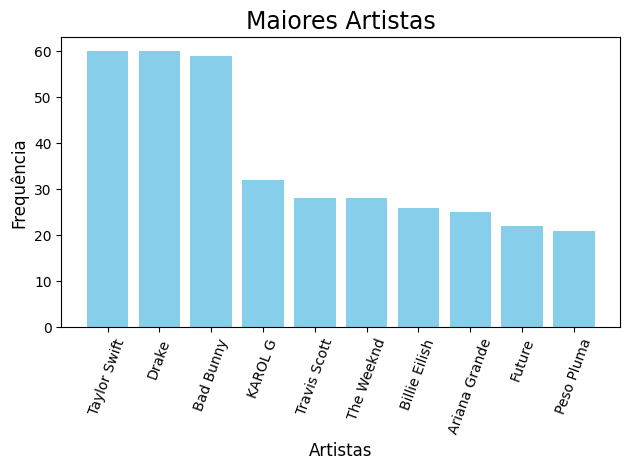

In [34]:
#Criando o gráfico
x = top_artistas.index 
y = top_artistas.values
plt.bar(x, y, color = 'skyblue')
plt.xlabel('Artistas', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Maiores Artistas', fontsize=17)
plt.xticks(rotation=70)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show

In [18]:
#Analise estatistica
top_artistas.describe()

count    10.000000
mean     36.100000
std      16.555966
min      21.000000
25%      25.250000
50%      28.000000
75%      52.250000
max      60.000000
Name: count, dtype: float64

In [33]:
#Já sabemos a média, vamos calcular a mediana e moda
mediana = top_artistas.median()
moda = top_artistas.mode()

print('A mediana é:', mediana, 'e a moda é:', moda)

A mediana é: 28.0 e a moda é: 0    28
1    60
Name: count, dtype: int64


Podemos observar que Taylor Swift e Drake estão empatados como os artistas com o maior número de músicas no ranking, enquanto os três principais artistas dominam a maior parte dos lançamentos. Segundo os dados estatísticos, a média de músicas lançadas por artista é de 36, porém este valor não é representativo, já que a maioria dos valores está concentrada nos três principais artistas. A moda e a mediana, ambas resultando em 28, refletem valores mais próximos da centralidade, representando melhor a distribuição dos dados. A média elevada pode ser explicada pela concentração de lançamentos dos três artistas no topo, fazendo com que a média resulte um valor maior do que o esperado para a maioria dos artistas. 

### Qual artista tem mais músicas lançadas em 2024?

In [19]:
#Filtrando as músicas lançadas apenas em 2024
artist_2024 = new_data[new_data['Release Date'].dt.year == 2024]

In [20]:
#Exibindo as colunas 'Artist' e 'Release Date'
maior_2024 = artist_2024[['Artist', 'Release Date']]
maior_2024.head()

,Artist,Release Date
0,Tommy Richman,2024-04-26
1,Kendrick Lamar,2024-05-04
2,Artemas,2024-03-19
4,Eminem,2024-05-31
6,Benson Boone,2024-01-18


In [21]:
#Contando os artistas com mais músicas lançadas
artist_counts = maior_2024['Artist'].value_counts()
artist_counts.head(1)

Artist
Taylor Swift    22
Name: count, dtype: int64

Portanto, a artista que mais teve músicas lançada no ano de 2024 é a **Taylor Swift**, com o total de **22 músicas** lançadas.

### Para o artista mais relevante, compare o desempenho entre Spotify e YouTube.

A artista mais relevante é Taylor Swift, que se destaca tanto no ranking geral de músicas lançadas quanto no ranking de músicas lançadas em 2024. Agora faremos a comparação gráfica do desempenho de algumas de suas faixas nas plataformas Spotify e YouTube. Como mostrado na análise anterior, Taylor Swift possui um total de 60 músicas, o que torna a visualização completa no gráfico bastante complexa. Portanto, para uma análise mais eficiente, vamos concentrar nas 15 músicas mais relevantes conforme o ranking do próprio dataset, facilitando a interpretação dos dados e a comparação entre as plataformas.

In [22]:
#Filtrando apenas as músicas lançadas pela Taylor
taylor = new_data[new_data['Artist'] == 'Taylor Swift']

In [23]:
#Filtrando apenas as 15 primeiras
artist_taylor = taylor.head(15)

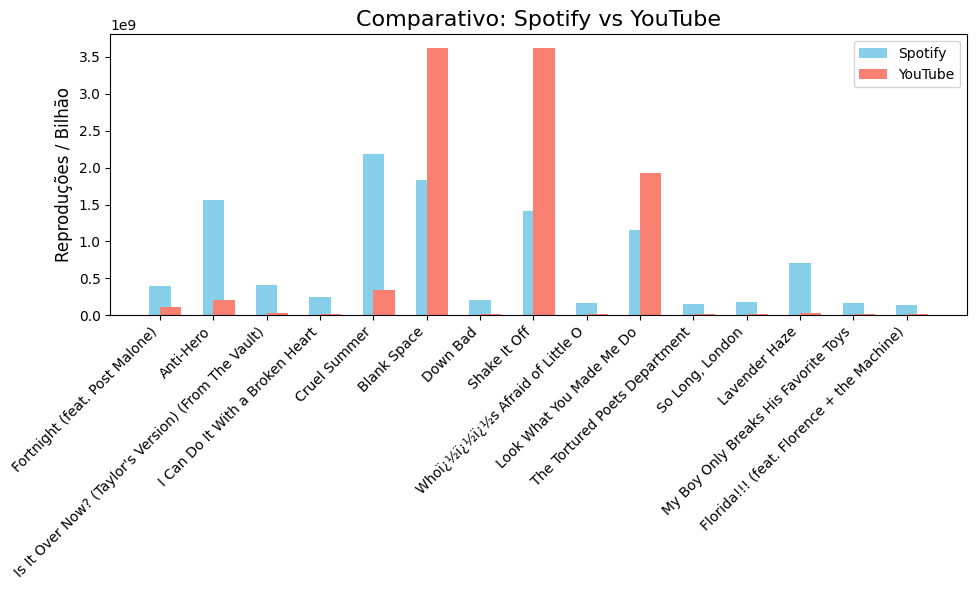

In [29]:
#Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

#Criando as barra com valores do Spotify e YouTube
ax.bar(artist_taylor['Track'], artist_taylor['Spotify Streams'], width=0.4, label='Spotify', align='center', color='skyblue')
ax.bar(artist_taylor['Track'], artist_taylor['YouTube Views'], width=0.4, label='YouTube', align='edge', color='salmon')

# Colocando título e rótulos
ax.set_title('Comparativo: Spotify vs YouTube', fontsize=16)
ax.set_ylabel('Reproduções / Bilhão', fontsize=12)
ax.legend()

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')  # Para girar as labels das músicas
plt.tight_layout()  # Ajusta para não cortar as legendas
plt.show()


Podemos observar que, na maioria das músicas analisadas, o número de reproduções no Spotify supera o do YouTube. Porém, nas poucas músicas em que o YouTube apresenta maior número de reproduções, a diferença é significativamente mais impactante em relação ao Spotify. Com base nisso, alguns insights importantes são:

- O Spotify é uma plataforma voltada exclusivamente para áudio, enquanto o YouTube é voltado para o audivisual. Isso sugere que as músicas com maior número de reproduções no YouTube possuem performances audiovisuais mais cativantes, como videoclipes impactantes.
- O público do Spotify tende a ser mais específico, composto por fãs e ouvintes frequentes da artista, criando e consumindo playslists e tendo acesso a novos lançamentos que são indicados por parte da plataforma. Já o YouTube alcança um público geral, o que pode explicar por que as músicas com alto desempenho nessa plataforma possuem um apelo mais viral, ultrapassando a bolha dos fãs e alcançando pessoas que não necessariamente acompanham a artista regularmente mas que foram cativados pela música ou pelo videoclipe.